# TotalMarketValue Analysis

## Dataset Description:
The objective of this report is to perform an exploratory analysis of the “Total Market Value” variable in the context of Colombian soccer. Through the use of different graphical and statistical techniques, we seek to understand the factors that influence the market value of players, explore the distributions of the related variables, and detect possible anomalies or outliers that could be affecting the data. This analysis will serve as a basis for further research, such as the identification of players with growth potential or the prediction of the market value of Colombian soccer teams, which is the main objective of this project.

## Data Dictionary:

- `Total Market Value`: Variable to be predicted, it is the market value of the team in dollars.

- `Club`: The name of the football team.

- `Squad`: Total amoun of players registered in the team. It is important to evaluate the size of the team and the relation with the total market value. 

- `Foreigners`: Number of foreigners players on the team. It allows us to examine the team diversity and its dependency on international talent. 

- `titles obtained`: Amount of titles by the teams both, national and internaionally. 

- `Market value` : The average unique market value of each player can be influenced by many factors such as age, recent performance, and demand in the transfer market. 

- `Average attendance` : Number of attendees at each team's stadiums, which can give an estimate of the amount of money coming in from attendance. 

In [ ]:
# REPRESENTACIÓN, NORMALIZACIÓN Y LIMPIEZA DE DATOS 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew


# Función para limpiar y convertir valores de mercado
def clean_market_value(column):
    # Eliminar el símbolo € si existe
    column_cleaned = column.str.replace('€', '', regex=False)
    
    # Convertir millones ('m') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('m', '')) * 1_000_000 if isinstance(x, str) and 'm' in x else x)
    
    # Convertir miles ('k') a su valor numérico real
    column_cleaned = column_cleaned.apply(lambda x: float(x.replace('k', '')) * 1_000 if isinstance(x, str) and 'k' in x else x)
    
    # Convertir finalmente a numérico
    return pd.to_numeric(column_cleaned, errors='coerce')

# Leer todas las hojas del archivo Excel en un diccionario de DataFrames
sheets_dict = pd.read_excel(r'C:\Users\User\Downloads\BD_TotalMarketValue.xlsx', sheet_name=None, header=1)

# Crear un nuevo diccionario para almacenar las hojas modificadas
cleaned_sheets_dict = {}

# Iterar sobre cada hoja y realizar las operaciones necesarias
for sheet_name, df in sheets_dict.items():
    
    # Normalizar el nombre de las columnas
    df = df.rename(columns=lambda x: x.strip().lower())  # Elimina espacios en blanco y convierte a minúsculas

    # Eliminar la columna "unnamed: 0" si existe
    if 'unnamed: 0' in df.columns:
        df = df.drop(columns=['unnamed: 0'])

    # Limpiar las columnas 'total market value' y 'market value'
    if 'total market value' in df.columns:
        df['total market value'] = clean_market_value(df['total market value'])
    if 'market value' in df.columns:
        df['market value'] = clean_market_value(df['market value'])

    # Método fillna para imputar los valores NaN
    df.fillna({'total market value': df['total market value'].median(), 'market value': df['market value'].median()}, inplace=True)

    # Guardar el DataFrame modificado en el nuevo diccionario
    cleaned_sheets_dict[sheet_name] = df
    
    print(f"Hoja procesada: {sheet_name}")
    print(df)  
    df.isna().sum() 
    df.shape
    df.info()  
    

    


## Exploratory data analysis EDA 

The objective of this instance is to perform an exploratory analysis of the “Total Market Value” variable in the context of Colombian soccer. Through the use of different graphical and statistical techniques, we seek to understand the factors that influence the market value of players, explore the distributions of the related variables, and detect possible anomalies or outliers that could be affecting the data. This analysis will serve as a basis for further research, such as the identification of players with growth potential or the prediction of the market value of Colombian soccer teams. 

In [ ]:
# Crear una lista vacía para almacenar los DataFrames
combined_data = []

# Recorrer las hojas y añadir una columna de 'año'
for sheet_name, df in cleaned_sheets_dict.items():
    # Extraer el año del nombre de la hoja
    year = sheet_name.split('_')[-1]
    
    # Añadir la columna 'year' al DataFrame
    df['year'] = int(year)
    
    # Añadir el DataFrame a la lista
    combined_data.append(df)

# Combinar todos los DataFrames en uno solo
df_combined = pd.concat(combined_data, ignore_index=True)



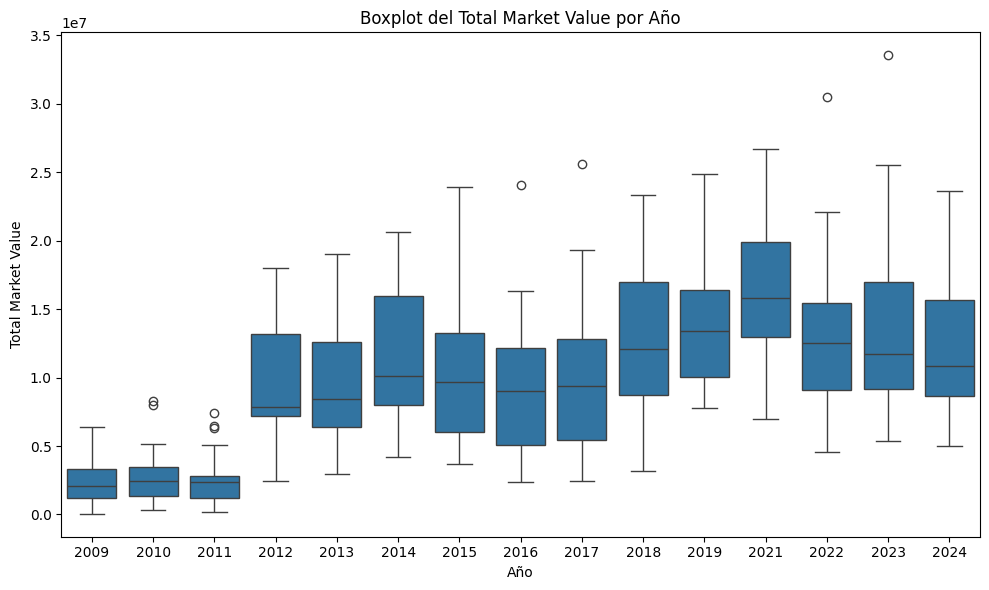

In [9]:

# Boxplot del total market value por año

plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='total market value', data=df_combined)
plt.title('Boxplot del Total Market Value por Año')
plt.xlabel('Año')
plt.ylabel('Total Market Value')
plt.tight_layout()

## FINDINGS

`Median`: The median for each year is represented by the line inside each box. Broadly speaking: In the early years (2009-2011), the median of total market value is low, but starting in 2012, it starts to grow gradually.
Starting in 2016, the median fluctuates, reaching higher peaks in 2017 and 2023. The increase in the median between 2009 and 2024 suggests a general trend of growth in total market value over the years, with some fluctuations.
`Interquartile Range (IQR)`: - The IQR is the range between the first quartile (Q1) and the third quartile (Q3), represented by the length of the box. This range indicates the dispersion of the middle 50% of the data.
In the early years (2009-2011), the IQR is quite small, suggesting little variability in team market values.
- Beginning in 2012, the IQR increases noticeably, indicating a greater dispersion in market values. This may reflect that some teams are growing significantly in value, while others are not.
- The year 2024 shows a wider dispersion compared to the early years, indicating greater variability among team values.
` Outliers`: The points outside the boxes are outliers, representing teams whose market value is exceptionally high or low compared to the rest of the teams in a specific year.
In the years 2010 and 2011, there are several low outliers, meaning that some teams had significantly lower market values ​​than the rest. These teams are Deportivo Cali, who had incorporated players such as Faryd Mondragón, Álvaro Domínguez, Sergio Leal and Vladimir Marín into their ranks, whose market value exceeded one million euros for that year. The other team, Atlético Nacional, had players such as Macnelly Torres in its ranks, exceeding 2 million euros, and players such as Luis Fernando Mosquera, Johan Fano, Jherson Córdoba and Dorlan Pabón, exceeding one million euros.
From 2016 onwards, high atypical values ​​began to appear, indicating that some teams stand out with a market value much higher than the average. This is especially seen in the years 2016 with Atlético Nacional, where there were players such as Alexis Henriquez, Sebastián Perez and Macnelly Torres with values ​​of 1M€, and players such as Victor Ibarbo, whose value for that year was 8.50M€. In 2017, it was DIM who had players like Juan Fernando Quintero with a market value of €10M and Valentín Viola, the most valued of that squad. By 2022, Atlético Junior had around 10 players who had a market value above one million Euros, to that added players like Miguel Borja with €3.20M and Carlos Bacca with €2.00M who increased the total market value of the team. Finally, in 2023, Atlético Junior would incorporate into its ranks Juan Fernando Quintero with a market value of €6.00M, Deiber Caicedo with €3.00M, added to that around 7 players with values ​​above €1M.
` Bigotes (moustaches)` : The mustaches extend from the quartiles to the highest or lowest value that is not considered an outlier (usually 1.5 times the IQR).
Overall, the whiskers show that, starting in 2012, the range of total market values ​​has grown at both the bottom and top, reflecting an increase in the dispersion of values.
In more recent years (2020-2024), the whiskers are longer, indicating greater variability in team values.
. `General trend` : Growth: From 2009 to 2024, there appears to be an upward trend in Total Market Value, especially starting in 2012. This growth may reflect an increase in investments, better football players, or better financial management in the Colombian .
Variability: Starting in 2012, the variability in market values ​​between teams increases, suggesting a growing gap between teams with greater resources and teams with fewer. Some teams grow a lot in value, while others remain at a lower level.
Significant outliers: In recent years, some teams have significantly outperformed in terms of market value, especially Atlético Junior in 2023, which could be due to factors such as expensive signings, sporting successes or important commercial agreements.
From 2009 to 2024, the Colombian team that has had the highest market value is Atlético Junior with a value of €30.48M


Text(0, 0.5, 'Total Market Value Promedio')

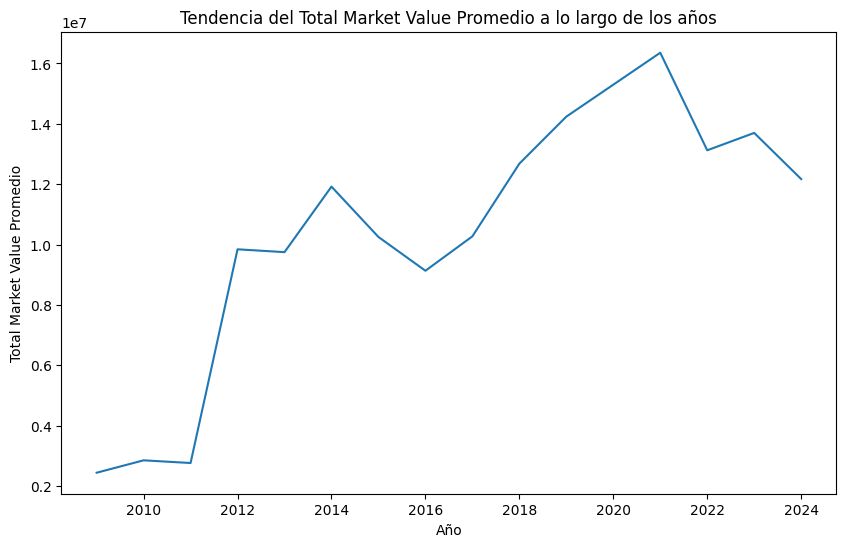

In [10]:
# Agrupamos por año para calcular posteriormente el lineplot
df_grouped = df_combined.groupby('year')['total market value'].mean().reset_index()

# Line plot de la tendencia global del total market value
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='total market value', data=df_grouped)
plt.title('Tendencia del Total Market Value Promedio a lo largo de los años') 
plt.xlabel('Año')
plt.ylabel('Total Market Value Promedio') 

## FINDINGS

- Identifying the general trend:

    - The line shows a general upward trend from 2009 to 2021, followed by a drop in 2022 and a slight recovery in 2023, with a further drop in 2024.

    - The sustained increase suggests that the average market value of teams in Colombia has grown in most of these years, with    fluctuations.
     
     ## Analysis of key periods:

- `2009 - 2011`: During these first years, the average market value is relatively low and stable, staying around 0.2 - 0.3 million euros. This could indicate a period in which Colombian clubs had a lower value in terms of players and football assets.

- `2012 - 2014`: From 2012 onwards, there is a notable increase, with a significant jump in the average value. This could reflect the new appreciation of players or the signing of more valuable players, greater investment in clubs or an improvement in the competitiveness of Colombian football at an international level.

- `2015 - 2017`: After a peak in 2014, a small drop is observed followed by oscillating behaviour. These movements could be due to fluctuations in player transfers, the quality of the squads or even external economic factors that impacted the value of the clubs.

- `2018 - 2021`: This is where the growth is most pronounced, reaching its maximum in 2021. In this period, the average value seems to have reached an all-time high, exceeding 160 million euros. This growth could be linked to:
Increase in the international visibility of Colombian teams.
Highlighted participations in international tournaments (Copa Libertadores, Sudamericana).
Improvements in infrastructure or in scouting and player training systems.

- `2022 - 2024`: Starting in 2022, the average value starts to decrease. The drop in 2022 is quite pronounced, but the value remains higher compared to the first years. Although there is a slight recovery in 2023, it falls again in 2024. This could be associated with:
    
    - Possible effects of the COVID-19 pandemic, which may have impacted the transfer market.

    - Departure of important players to foreign leagues.

    - Reduction of investment by clubs or changes in the economy of Colombian football.



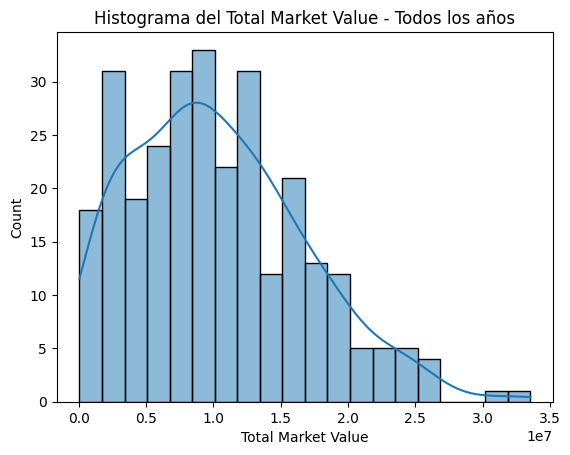

Asimetría de Fisher (Skewness) Global: 0.6118545223260476


In [13]:
# Histogram with KDE

sns.histplot(df_combined['total market value'], bins=20, kde=True)
plt.title('Histograma del Total Market Value - Todos los años')
plt.xlabel('Total Market Value')



# Cálculo de la asimetría de Fisher (Skewness) para los datos completos
fisher_skewness_global = skew(df_combined['total market value'])

plt.show()
print(f"Asimetría de Fisher (Skewness) Global: {fisher_skewness_global}")



## FINDINGS

`Asymmetric Distribution (Right Skew)`:

    For better data accuracy and interpretation, the Fisher skewness coefficient was calculated using the Scipy module by importing the skew function, giving a value of: 0.61185. This coefficient indicates that the distribution of market values ​​in the histogram is slightly skewed to the right. Therefore: This means that most football teams have market values ​​that are concentrated in the low range, i.e. between 0.0 and 1.5 million euros. Few teams have high market values, as seen in the 2.5 to 3.5 million euro bins, where the bars are significantly smaller.

`Concentration of teams` :

    Most teams are concentrated between 0.5 and 1.5 million euros, as indicated by the higher height of the bars in that range. This reinforces the idea that Colombian professional football has a large number of teams with more modest market values, while only a few clubs have a significantly higher market value.

`Exceptional teams`:

    The final section of the histogram, which includes market values ​​greater than 2.5 million euros, shows that there are very few teams that reach those values, which probably includes the most successful and popular teams in the country (such as Atlético Nacional, Deportivo Cali, Junior and DIM).

`KDE (Kernel Density Estimation)` :

    The smoothed curve (KDE) shows a continuous distribution that reflects the shape of the data and confirms that most teams are within the low range of market values, with an abrupt decrease in density towards the teams with the highest market value.

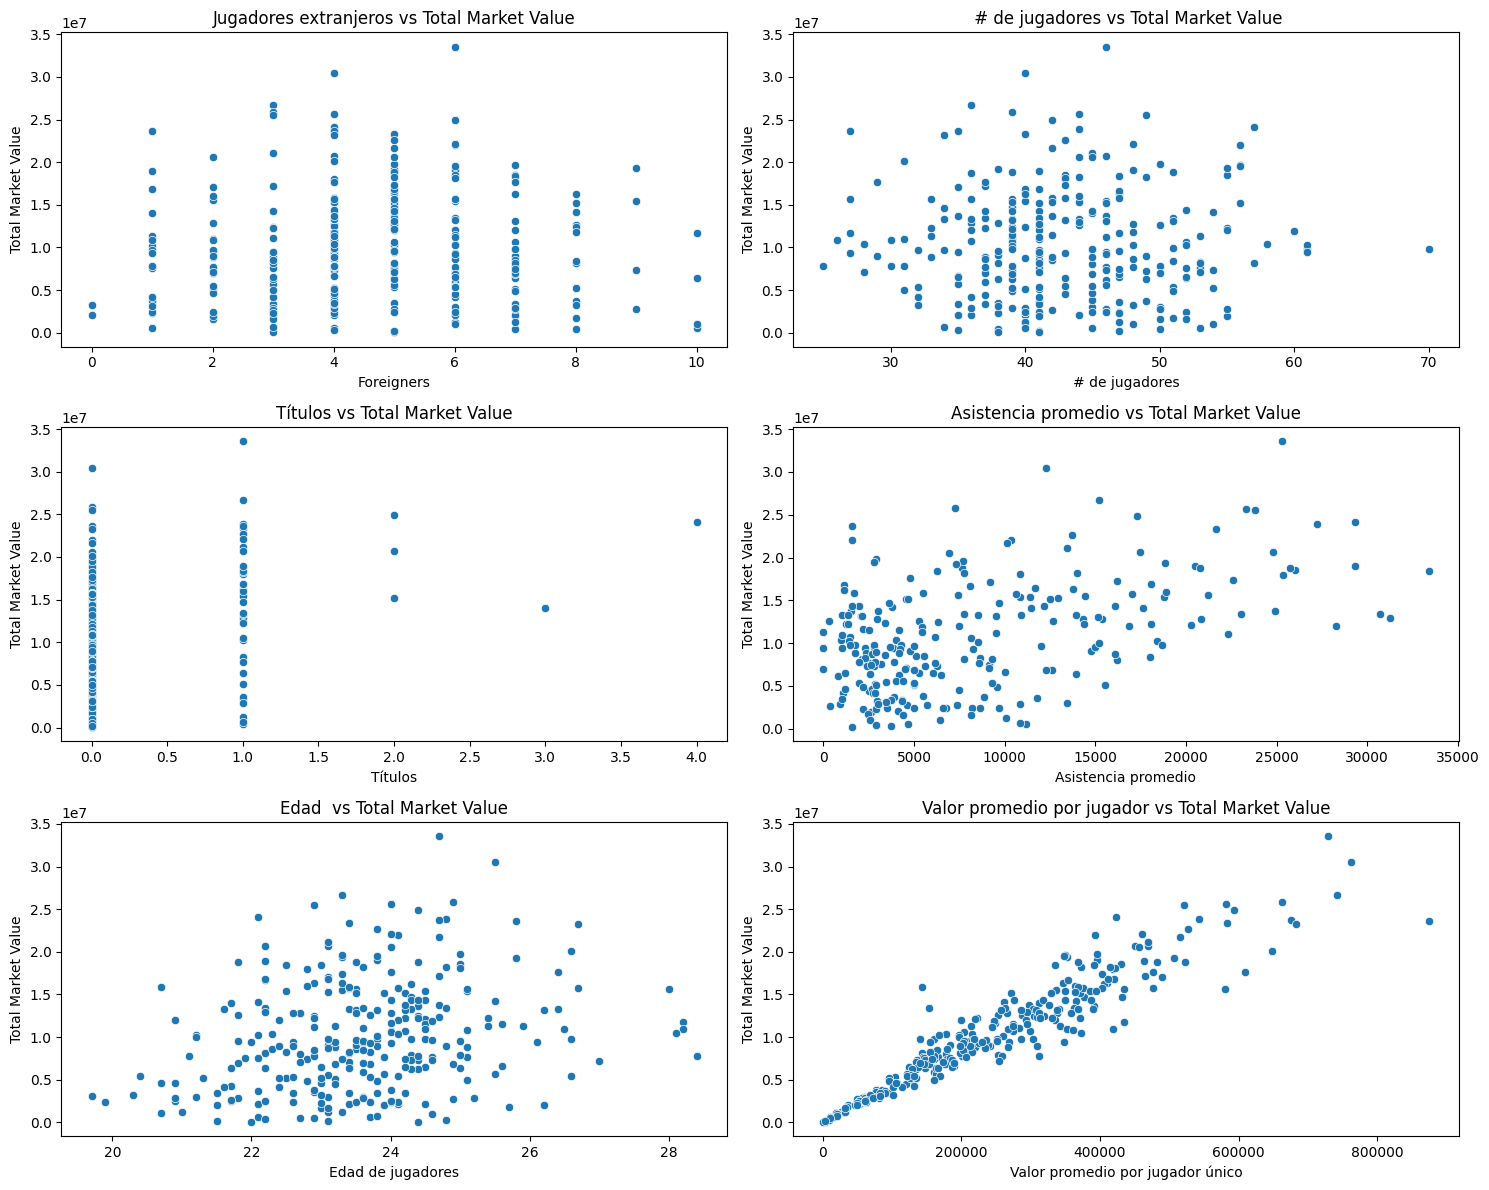

In [15]:

# Crear una figura con un arreglo de 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(15, 12))


# Subplot 1 Gráfico de dispersión entre Foreigners y total market value
sns.scatterplot(x='foreigners', y='total market value', data=df_combined, ax=axes[0, 0])
axes[0, 0].set_title('Jugadores extranjeros vs Total Market Value')
axes[0, 0].set_xlabel('Foreigners')
axes[0, 0].set_ylabel('Total Market Value')


# Subplot 2 Gráfico de dispersión entre Squad (número de jugadores) y total market value
sns.scatterplot(x='squad', y='total market value', data=df_combined, ax=axes[0, 1])
axes[0, 1].set_title(' # de jugadores vs Total Market Value')
axes[0, 1].set_xlabel('# de jugadores')
axes[0, 1].set_ylabel('Total Market Value')


# Subplot 3 Gráfico de dispersión entre cantidad de títulos y total market value 
sns.scatterplot(x='titulos', y='total market value', data=df_combined, ax=axes[1, 0])
axes[1, 0].set_title('Títulos vs Total Market Value')
axes[1, 0].set_xlabel('Títulos')
axes[1, 0].set_ylabel('Total Market Value')


#Subplot # 4 Gráfico de dispersión entre asistencia promedio a los estadios y total market value 
sns.scatterplot(x='promedio asistencia', y='total market value', data=df_combined, ax=axes[1, 1])
axes[1, 1].set_title('Asistencia promedio vs Total Market Value')
axes[1, 1].set_xlabel('Asistencia promedio')
axes[1, 1].set_ylabel('Total Market Value')


# Subplot 5: Gráfico de dispersión entre edad promedio de jugadores y total market value
sns.scatterplot(x='age', y='total market value', data=df_combined, ax=axes[2, 0])
axes[2, 0].set_title('Edad  vs Total Market Value')
axes[2, 0].set_xlabel('Edad de jugadores')
axes[2, 0].set_ylabel('Total Market Value')

# Subplot 6: Gráfico de dispersión entre valor promedio de cada jugador y valor de total market value 
sns.scatterplot(x= 'market value', y ='total market value', data=df_combined, ax=axes[2,1])
axes[2, 1].set_title('Valor promedio por jugador vs Total Market Value')
axes[2, 1].set_xlabel('Valor promedio por jugador único')
axes[2, 1].set_ylabel('Total Market Value')



# Ajustar los subplots para que no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show() 






## FINDINGS

1. `Foreign players vs Total market value`

    Observation: The graph shows that the number of foreign players has no clear relationship with the total market value. There is a considerable dispersion in the total market value, regardless of the number of foreigners in the team.

    Interpretation: This suggests that having more foreign players does not necessarily increase the total value of the team. There may be teams that have a low number of foreigners but still have a high total market value, possibly due to the quality of the players, their experience or the impact on the league.

2. `Numbers of players vs Total market value`

    Observation: Similar to the graph above, there does not seem to be a direct relationship between the number of players on a team and its total market value. The dispersion is wide, with some teams having a high market value with fewer players and others with many more players.

    Interpretation: This suggests that the number of players on a team is not the only factor determining its value. Player quality, level of competition, and club strategy can have a bigger influence on the total value of the team than simply the number of squad members.

3. `Titles vs Total Market Value`
    
    Observation: In this chart, we can see a clear clustering of the data. Teams with more titles do not necessarily have a high total market value. Most teams seem to be concentrated in the 0-2 titles range, regardless of value.

    Interpretation: This could indicate that success in terms of titles does not always translate into higher market value. Some teams may have been successful in the competition without needing significant investments, which may be reflected in a relatively low market value.

4. `Average Attendance vs Total Market Value`

    Observation: Here we can see a trend that as average attendance increases, so does total market value. Although the relationship is not perfectly linear, there is an increasing trend.

    Interpretation: This suggests that match attendance could be correlated with team value. Teams that generate more gate revenue and have a strong fan base may have a higher market value, possibly due to their ability to invest in players and other resources.

5. `Age average vs Total market value` 
    
    Observation: Although the graph seems to show a slight trend to the right, just like the previous one, this chart does not shows a clear relation between age an total market value. 

    Interpretation: The age of the players does not seem to be a significant variable, which indicates that there may be teams with very young players or with advanced ages which would not have a direct impact on the market value of the teams.

6. ` Average market value per player vs Total market value`   




`General Conclusions`

Although the charts show little correlation overall, the analysis allows us to identify patterns and areas that merit further analysis. Player investment, club strategy, and fan engagement appear to be factors that affect team value in ways that may not be immediately obvious.
It would be interesting to compare these findings with other indicators, such as league performance or investment in player development, to get a more complete picture of the market value of teams.